In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice_chef = pd.read_excel(file)

In [2]:
# using .shape to view (ROWS, COLUMNS)
apprentice_chef.shape


(1946, 28)

In [3]:
print(apprentice_chef.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [4]:
apprentice_chef.head(n = 5) # Checking contennt of the DF

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [5]:
apprentice_chef.info() # CHECKING  TYPE OF EACH FEATURE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

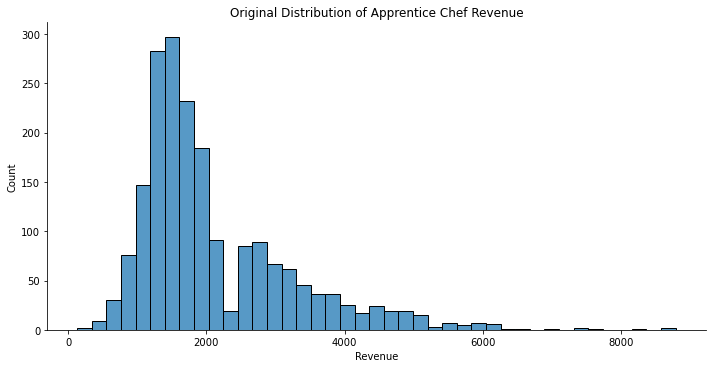

In [6]:
# Develop a histogram to analyze the distribution of the Y-variable.
sns.displot(data   = apprentice_chef,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Apprentice Chef Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

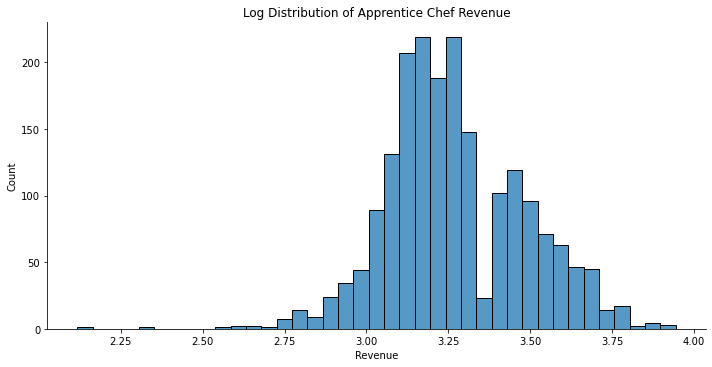

In [7]:
# Develop a histogram to analyze the distribution of the Y-variable. We Applied LOG because it is skew to the left

apprentice_chef['log_REVENUE'] = np.log10(apprentice_chef['REVENUE'])

sns.displot(data   = apprentice_chef,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)



plt.title(label   = "Log Distribution of Apprentice Chef Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [8]:
apprentice_chef.describe(include = [int, float]).round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,3.27
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.21
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,2.12
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,3.13
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,3.24
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,3.43
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,3.94


In [9]:
apprentice_chef = apprentice_chef.rename(columns={'LARGEST_ORDER_SIZE': 'AVERAGE_ORDER_SIZE'})

#CONTINUOUS
----------

REVENUE,
AVG_TIME_PER_SITE_VISIT,
AVG_PREP_VID_TIME,
TOTAL_MEALS_ORDERED,
TOTAL_PHOTOS_VIEWED,
WEEKLY_PLAN,
UNIQUE_MEALS_PURCH,


#INTERVAL/COUNT
--------------
CONTACTS_W_CUSTOMER_SERVICE,
PC_LOGINS,
MOBILE_LOGINS,
CANCELLATIONS_BEFORE_NOON,
CANCELLATIONS_AFTER_NOON,
MASTER_CLASSES_ATTENDED,
MEDIAN_MEAL_RATING,

EARLY_DELIVERIES,
LATE_DELIVERIES,

AVERAGE_ORDER_SIZE,
AVG_CLICKS_PER_VISIT,
PRODUCT_CATEGORIES_VIEWED,

#CATEGORICAL
-----------
NAME,
EMAIL,
FIRST_NAME,
FAMILY_NAME,
CROSS_SELL_SUCCESS,
MOBILE_NUMBER,
PACKAGE_LOCKER,
REFRIGERATED_LOCKER,
TASTES_AND_PREFERENCES,

-----------

In [10]:
apprentice_chef.isnull().sum(axis = 0) # We check for null values, onyl null values on family name which is a feature we wont use 

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
AVERAGE_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
log_REVENUE                     0
dtype: int64

In [11]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df
#changing names
email_df.columns = ['0' , 'email_domain']

In [12]:
# email domain types
personal_email_domains = ['gmail.com', 'yahoo.com','protonmail.com' ]
junk_email_domains=['msn.com','aol.com','hotmail.com','live.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df['email_domain']:
    
    if  domain in personal_email_domains:
        placeholder_lst.append('personal')
    
    elif domain in junk_email_domains:
        placeholder_lst.append('junk')    

    else:
        placeholder_lst.append('professional')

# concatenating with original DataFrame
email_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
email_df['domain_group'].value_counts()

personal        861
professional    819
junk            266
Name: domain_group, dtype: int64

In [13]:
#we append the type of mail to our original use by the client on their registration to the DF and change the name to TYPE_MAIL

TYPE_MAIL=email_df['domain_group']
apprentice_chef=apprentice_chef.join(TYPE_MAIL)
apprentice_chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVERAGE_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,domain_group
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,professional
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,professional
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,professional
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,professional
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,professional


In [14]:
apprentice_chef = apprentice_chef.rename(columns={'domain_group': 'TYPE_MAIL'})

In [15]:
apprentice_chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVERAGE_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,TYPE_MAIL
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,professional
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,professional
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,professional
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,professional
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,professional


Text(0, 0.5, 'log_REVENUE')

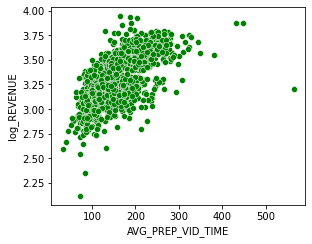

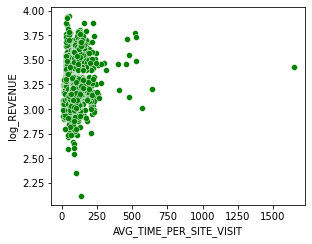

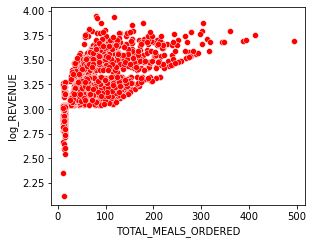

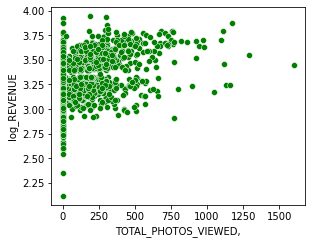

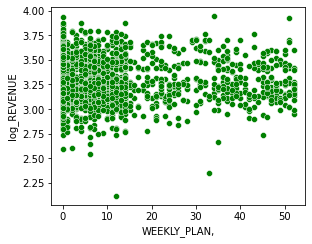

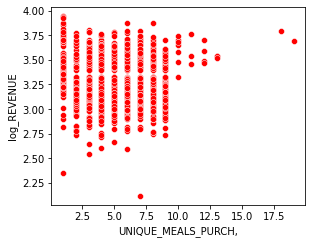

In [16]:
########################
# Visual EDA (Scatterplots) on Continuos variables 
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x    = apprentice_chef['AVG_PREP_VID_TIME'],
                y    = apprentice_chef['log_REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'log_REVENUE')


########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x    = apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
                y    = apprentice_chef['log_REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'log_REVENUE')


########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x    = apprentice_chef['TOTAL_MEALS_ORDERED'],
                y    = apprentice_chef['log_REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'log_REVENUE')


########################

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x    = apprentice_chef['TOTAL_PHOTOS_VIEWED'],
                y    = apprentice_chef['log_REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED,')
plt.ylabel(ylabel = 'log_REVENUE')


########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))
# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x    = apprentice_chef['WEEKLY_PLAN'],
                y    = apprentice_chef['log_REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY_PLAN,')
plt.ylabel(ylabel = 'log_REVENUE')


########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))
# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x    = apprentice_chef['UNIQUE_MEALS_PURCH'],
                y    = apprentice_chef['log_REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH,')
plt.ylabel(ylabel = 'log_REVENUE')


In [17]:
# creating a list of continuous features (including log_Revenue)
continuous_data = ['log_REVENUE','AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME',
                    'TOTAL_MEALS_ORDERED','TOTAL_PHOTOS_VIEWED','WEEKLY_PLAN','UNIQUE_MEALS_PURCH']


# developing a correlation matrix based on continuous features
chef_corr = apprentice_chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with log_REVENUE
chef_corr.loc[ : , 'log_REVENUE'].round(decimals = 2).sort_values(ascending = False)

log_REVENUE                1.00
AVG_PREP_VID_TIME          0.65
TOTAL_MEALS_ORDERED        0.61
TOTAL_PHOTOS_VIEWED        0.43
AVG_TIME_PER_SITE_VISIT    0.14
WEEKLY_PLAN                0.01
UNIQUE_MEALS_PURCH        -0.08
Name: log_REVENUE, dtype: float64

In [18]:
#CONVERTING variables with no zero values  to log 

apprentice_chef['log_TOTAL_MEALS_ORDERED'] = np.log10(apprentice_chef['TOTAL_MEALS_ORDERED'])
apprentice_chef['log_AVG_PREP_VID_TIME'] = np.log10(apprentice_chef['AVG_PREP_VID_TIME'])
apprentice_chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(apprentice_chef['AVG_TIME_PER_SITE_VISIT'])
apprentice_chef['log_UNIQUE_MEALS_PURCH'] = np.log10(apprentice_chef['UNIQUE_MEALS_PURCH'])


In [19]:
continuous_log_data = ['log_REVENUE','log_AVG_TIME_PER_SITE_VISIT','log_AVG_PREP_VID_TIME',
                    'log_TOTAL_MEALS_ORDERED','TOTAL_PHOTOS_VIEWED','WEEKLY_PLAN','log_UNIQUE_MEALS_PURCH']

# developing a correlation matrix based on continuous log features
chef_corr_log = apprentice_chef[continuous_log_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
chef_corr_log.loc[ : , 'log_REVENUE'].round(decimals = 2).sort_values(ascending = False)

log_REVENUE                    1.00
log_TOTAL_MEALS_ORDERED        0.69
log_AVG_PREP_VID_TIME          0.67
TOTAL_PHOTOS_VIEWED            0.43
log_AVG_TIME_PER_SITE_VISIT    0.15
WEEKLY_PLAN                    0.01
log_UNIQUE_MEALS_PURCH        -0.13
Name: log_REVENUE, dtype: float64

In [20]:
# counting the number of zeroes
PRE_VID_zeroes     = len(apprentice_chef['AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] == 0])
TIME_VISIT_zeroes  = len(apprentice_chef['AVG_TIME_PER_SITE_VISIT'][apprentice_chef['AVG_TIME_PER_SITE_VISIT'] == 0])
MEALS_ORDER_zeroes = len(apprentice_chef['TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] == 0])
PHOTOS_zeroes      = len(apprentice_chef['TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED'] == 0])
Weekly_zeroes      = len(apprentice_chef['WEEKLY_PLAN'][apprentice_chef['WEEKLY_PLAN'] == 0])
Unique_meal_zeroes = len(apprentice_chef['UNIQUE_MEALS_PURCH'][apprentice_chef['UNIQUE_MEALS_PURCH'] == 0])
## the table below has been coded for you ##

# printing a table of the results
print(f"""
                             No\t\tYes
                     ---------------------
Prep Instruction Video      | {PRE_VID_zeroes}\t\t{len(apprentice_chef) - PRE_VID_zeroes}
Time in Web Page or App     | {TIME_VISIT_zeroes}\t\t{len(apprentice_chef) - TIME_VISIT_zeroes}
Total Meals Ordered         | {MEALS_ORDER_zeroes}\t\t{len(apprentice_chef) - MEALS_ORDER_zeroes}
Total Photos Viewed         | {PHOTOS_zeroes}     \t\t{len(apprentice_chef) - PHOTOS_zeroes}
Total Weekly Plan           | {Weekly_zeroes  }     \t\t{len(apprentice_chef) - Weekly_zeroes} 
Total Unique Meals          | {Unique_meal_zeroes  }     \t\t{len(apprentice_chef) - Unique_meal_zeroes} 
""")



                             No		Yes
                     ---------------------
Prep Instruction Video      | 0		1946
Time in Web Page or App     | 0		1946
Total Meals Ordered         | 0		1946
Total Photos Viewed         | 1140     		806
Total Weekly Plan           | 468     		1478 
Total Unique Meals          | 0     		1946 



In [21]:
# dummy variable for viewing photos and weekly plan
apprentice_chef['PHOTO_VIEWED']      = 0
apprentice_chef['WITH_WEEKLY_PLAN']     = 0

for index, value in apprentice_chef.iterrows():
    
    # Total_Photos Viewed
    if apprentice_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice_chef.loc[index, 'PHOTO_VIEWED'] = 1
    
    if apprentice_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice_chef.loc[index, 'WITH_WEEKLY_PLAN'] = 1

In [22]:
apprentice_chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVERAGE_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,TYPE_MAIL,log_TOTAL_MEALS_ORDERED,log_AVG_PREP_VID_TIME,log_AVG_TIME_PER_SITE_VISIT,log_UNIQUE_MEALS_PURCH,PHOTO_VIEWED,WITH_WEEKLY_PLAN
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,professional,1.146128,1.523746,1.681241,0.778151,0,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,professional,1.939519,1.928396,1.605844,0.477121,1,1
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,professional,1.176091,1.799341,1.296007,0.845098,0,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,professional,1.113943,1.641474,1.954243,0.778151,0,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,professional,1.672098,1.928396,1.606166,0.903090,1,1


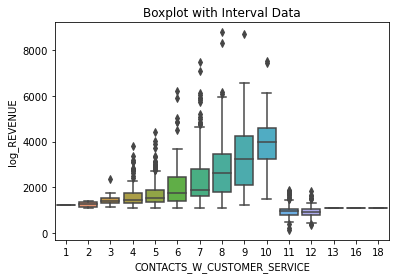

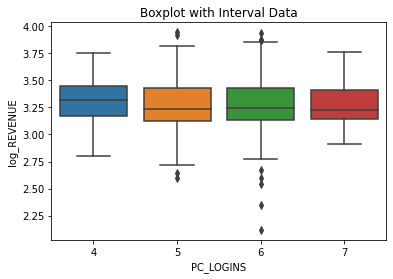

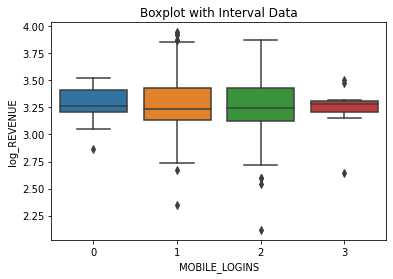

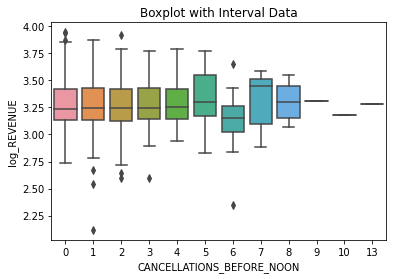

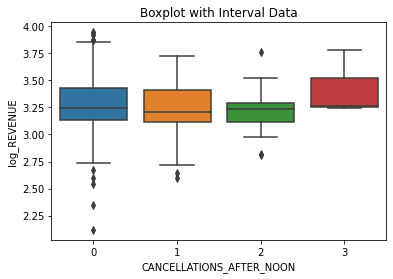

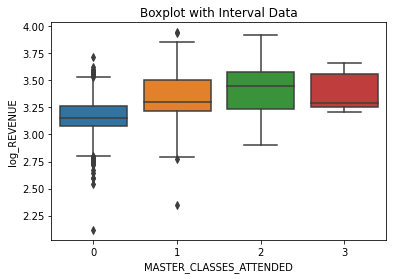

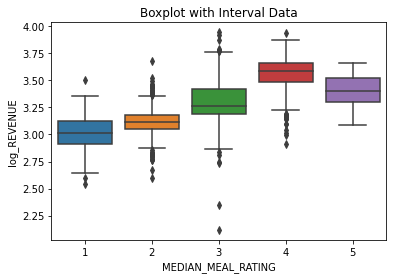

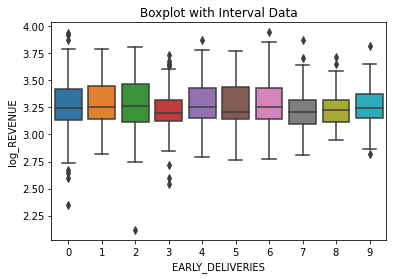

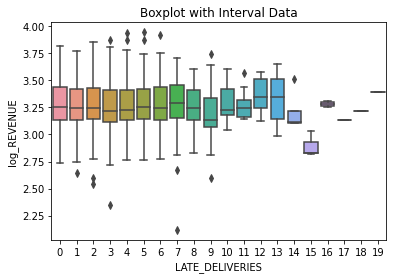

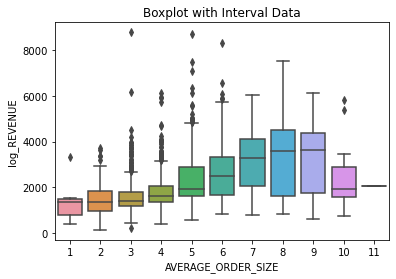

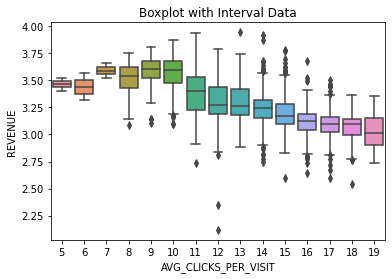

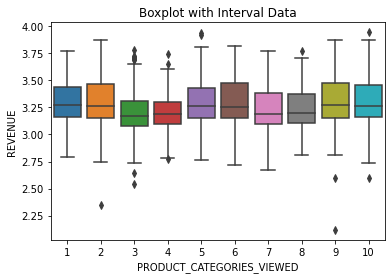

In [23]:
#working with interval and counting data generating blox plots

# developing a boxplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'PC_LOGINS',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()



# developing a boxplot
sns.boxplot(x    = 'EARLY_DELIVERIES',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'LATE_DELIVERIES',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()


# developing a boxplot
sns.boxplot(x    = 'AVERAGE_ORDER_SIZE',
            y    = 'REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'AVERAGE_ORDER_SIZE')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'AVG_CLICKS_PER_VISIT',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()






In [24]:
#creating two variables by adding cancelations before and after noon  as total cancelations
#creating variables adding mobiles and pc logins as total logins

# total cancellations
apprentice_chef['TOTAL_CANCELATIONS'] = apprentice_chef['CANCELLATIONS_BEFORE_NOON'] + apprentice_chef['CANCELLATIONS_AFTER_NOON'] 

#TOTAL LOGINS
apprentice_chef['TOTAL_LOGINS'] = apprentice_chef['PC_LOGINS'] + apprentice_chef['MOBILE_LOGINS'] 



In [25]:
apprentice_chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVERAGE_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,TYPE_MAIL,log_TOTAL_MEALS_ORDERED,log_AVG_PREP_VID_TIME,log_AVG_TIME_PER_SITE_VISIT,log_UNIQUE_MEALS_PURCH,PHOTO_VIEWED,WITH_WEEKLY_PLAN,TOTAL_CANCELATIONS,TOTAL_LOGINS
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,professional,1.146128,1.523746,1.681241,0.778151,0,0,4,7
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,professional,1.939519,1.928396,1.605844,0.477121,1,1,0,6
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,professional,1.176091,1.799341,1.296007,0.845098,0,0,3,7
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,professional,1.113943,1.641474,1.954243,0.778151,0,0,2,7
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,professional,1.672098,1.928396,1.606166,0.903090,1,1,0,6


In [26]:
#Converting to log some variables (no zero values)

apprentice_chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'])
apprentice_chef['log_MEDIAN_MEAL_RATING'] = np.log10(apprentice_chef['MEDIAN_MEAL_RATING'])
apprentice_chef['log_AVERAGE_ORDER_SIZE'] = np.log10(apprentice_chef['AVERAGE_ORDER_SIZE'])
apprentice_chef['log_AVG_CLICKS_PER_VISIT'] = np.log10(apprentice_chef['AVG_CLICKS_PER_VISIT'])
apprentice_chef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(apprentice_chef['PRODUCT_CATEGORIES_VIEWED'])

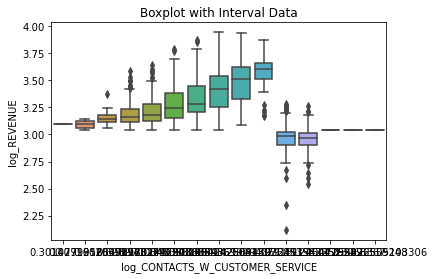

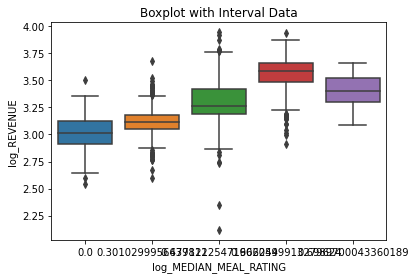

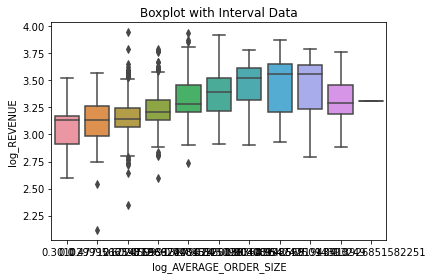

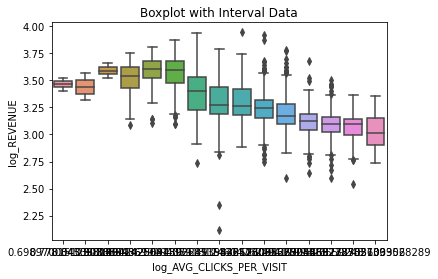

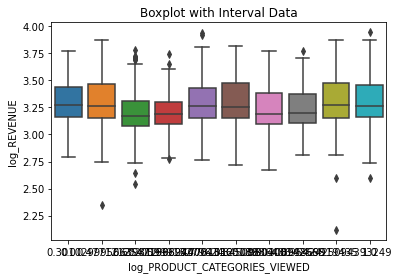

In [27]:
#working with interval and counting data

# developing a boxplot
sns.boxplot(x    = 'log_CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'log_CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'log_MEDIAN_MEAL_RATING',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'log_MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()


# developing a boxplot
sns.boxplot(x    = 'log_AVERAGE_ORDER_SIZE',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'log_AVERAGE_ORDER_SIZE')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'log_AVG_CLICKS_PER_VISIT',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'log_AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()

# developing a boxplot
sns.boxplot(x    = 'log_PRODUCT_CATEGORIES_VIEWED',
            y    = 'log_REVENUE',
            data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'log_PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.show()



In [28]:
#Feature Engineering - Encoding Categorical Data

# printing columns
print(f"""
CROSS SELL SUCCES
------
{apprentice_chef['CROSS_SELL_SUCCESS'].value_counts()}


MOBILE NUMBER
----------
{apprentice_chef['MOBILE_NUMBER'].value_counts()}


PACKAGE LOCKER
-------------
{apprentice_chef['PACKAGE_LOCKER'].value_counts()}


REFRIGERATED LOCKER
-------------
{apprentice_chef['REFRIGERATED_LOCKER'].value_counts()}


TASTES AND PREFERENCES 
-------------
{apprentice_chef['TASTES_AND_PREFERENCES'].value_counts()}

TYPE OF MAIL
-------------
{apprentice_chef['TYPE_MAIL'].value_counts()}
""")





CROSS SELL SUCCES
------
1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64


MOBILE NUMBER
----------
1    1708
0     238
Name: MOBILE_NUMBER, dtype: int64


PACKAGE LOCKER
-------------
0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64


REFRIGERATED LOCKER
-------------
0    1726
1     220
Name: REFRIGERATED_LOCKER, dtype: int64


TASTES AND PREFERENCES 
-------------
1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64

TYPE OF MAIL
-------------
personal        861
professional    819
junk            266
Name: TYPE_MAIL, dtype: int64



In [29]:
apprentice_chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVERAGE_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,TYPE_MAIL,log_TOTAL_MEALS_ORDERED,log_AVG_PREP_VID_TIME,log_AVG_TIME_PER_SITE_VISIT,log_UNIQUE_MEALS_PURCH,PHOTO_VIEWED,WITH_WEEKLY_PLAN,TOTAL_CANCELATIONS,TOTAL_LOGINS,log_CONTACTS_W_CUSTOMER_SERVICE,log_MEDIAN_MEAL_RATING,log_AVERAGE_ORDER_SIZE,log_AVG_CLICKS_PER_VISIT,log_PRODUCT_CATEGORIES_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,professional,1.146128,1.523746,1.681241,0.778151,0,0,4,7,1.079181,0.000000,0.0,1.230449,1.00000
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,professional,1.939519,1.928396,1.605844,0.477121,1,1,0,6,0.903090,0.477121,0.0,1.113943,0.90309
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,professional,1.176091,1.799341,1.296007,0.845098,0,0,3,7,1.041393,0.301030,0.0,1.204120,0.69897
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,professional,1.113943,1.641474,1.954243,0.778151,0,0,2,7,1.041393,0.301030,0.0,1.146128,0.69897
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,professional,1.672098,1.928396,1.606166,0.903090,1,1,0,6,0.778151,0.477121,0.0,1.079181,1.00000


In [30]:
# one hot encoding categorical variables : type mail
one_hot_TYPE_MAIL       = pd.get_dummies(apprentice_chef['TYPE_MAIL'])

# dropping categorical variables after they've been encoded
apprentice_chef = apprentice_chef.drop('TYPE_MAIL', axis = 1)


# joining codings together
apprentice_chef = apprentice_chef.join([one_hot_TYPE_MAIL])

apprentice_chef.head()


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVERAGE_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_AVG_PREP_VID_TIME,log_AVG_TIME_PER_SITE_VISIT,log_UNIQUE_MEALS_PURCH,PHOTO_VIEWED,WITH_WEEKLY_PLAN,TOTAL_CANCELATIONS,TOTAL_LOGINS,log_CONTACTS_W_CUSTOMER_SERVICE,log_MEDIAN_MEAL_RATING,log_AVERAGE_ORDER_SIZE,log_AVG_CLICKS_PER_VISIT,log_PRODUCT_CATEGORIES_VIEWED,junk,personal,professional
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,1.146128,1.523746,1.681241,0.778151,0,0,4,7,1.079181,0.000000,0.0,1.230449,1.00000,0,0,1
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,1.939519,1.928396,1.605844,0.477121,1,1,0,6,0.903090,0.477121,0.0,1.113943,0.90309,0,0,1
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,1.176091,1.799341,1.296007,0.845098,0,0,3,7,1.041393,0.301030,0.0,1.204120,0.69897,0,0,1
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,1.113943,1.641474,1.954243,0.778151,0,0,2,7,1.041393,0.301030,0.0,1.146128,0.69897,0,0,1
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,1.672098,1.928396,1.606166,0.903090,1,1,0,6,0.778151,0.477121,0.0,1.079181,1.00000,0,0,1


In [31]:
# creating a (Pearson) correlation matrix
df_corr = apprentice_chef.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['log_REVENUE'].sort_values(ascending = False))

log_REVENUE                        1.00
REVENUE                            0.95
log_TOTAL_MEALS_ORDERED            0.69
log_AVG_PREP_VID_TIME              0.67
AVG_PREP_VID_TIME                  0.65
MEDIAN_MEAL_RATING                 0.65
TOTAL_MEALS_ORDERED                0.61
log_MEDIAN_MEAL_RATING             0.61
MASTER_CLASSES_ATTENDED            0.47
log_AVERAGE_ORDER_SIZE             0.45
AVERAGE_ORDER_SIZE                 0.45
TOTAL_PHOTOS_VIEWED                0.43
PHOTO_VIEWED                       0.39
WITH_WEEKLY_PLAN                   0.39
log_AVG_TIME_PER_SITE_VISIT        0.15
AVG_TIME_PER_SITE_VISIT            0.14
log_CONTACTS_W_CUSTOMER_SERVICE    0.05
MOBILE_NUMBER                      0.04
PRODUCT_CATEGORIES_VIEWED          0.04
CROSS_SELL_SUCCESS                 0.01
log_PRODUCT_CATEGORIES_VIEWED      0.01
WEEKLY_PLAN                        0.01
personal                           0.01
TASTES_AND_PREFERENCES             0.01
PC_LOGINS                          0.01


In [32]:
# making a copy of housing to start our model
df_model =apprentice_chef.copy()


# dropping SalePrice and Order from the explanatory variable set
df_model_LOG = df_model.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME','CONTACTS_W_CUSTOMER_SERVICE',
                          'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT',                   
                         'WEEKLY_PLAN',  'MEDIAN_MEAL_RATING',
                         'AVG_CLICKS_PER_VISIT','AVERAGE_ORDER_SIZE','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',  
                         'TOTAL_MEALS_ORDERED','MEDIAN_MEAL_RATING','AVG_PREP_VID_TIME' 
                             ], axis = 1)

#df_model = df_model.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME','log_UNIQUE_MEALS_PURCH','log_CONTACTS_W_CUSTOMER_SERVICE',
 #                         'log_PRODUCT_CATEGORIES_VIEWED','PC_LOGINS','MOBILE_LOGINS',                     
  #                       'WEEKLY_PLAN',  'log_MEDIAN_MEAL_RATING','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON',
   #                      'log_AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED','log_AVERAGE_ORDER_SIZE'
    #                     ], axis = 1)



In [33]:
# creating a (Pearson) correlation matrix on our first model 
df_corr = df_model_LOG.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['log_REVENUE'].sort_values(ascending = False))

log_REVENUE                        1.00
REVENUE                            0.95
log_TOTAL_MEALS_ORDERED            0.69
log_AVG_PREP_VID_TIME              0.67
log_MEDIAN_MEAL_RATING             0.61
MASTER_CLASSES_ATTENDED            0.47
log_AVERAGE_ORDER_SIZE             0.45
TOTAL_PHOTOS_VIEWED                0.43
WITH_WEEKLY_PLAN                   0.39
PHOTO_VIEWED                       0.39
log_AVG_TIME_PER_SITE_VISIT        0.15
log_CONTACTS_W_CUSTOMER_SERVICE    0.05
MOBILE_NUMBER                      0.04
personal                           0.01
log_PRODUCT_CATEGORIES_VIEWED      0.01
CANCELLATIONS_BEFORE_NOON          0.01
CROSS_SELL_SUCCESS                 0.01
PC_LOGINS                          0.01
TASTES_AND_PREFERENCES             0.01
TOTAL_CANCELATIONS                -0.00
TOTAL_LOGINS                       0.00
professional                       0.00
REFRIGERATED_LOCKER               -0.01
EARLY_DELIVERIES                  -0.01
MOBILE_LOGINS                     -0.01


In [34]:
Y_log_target=df_model_LOG['log_REVENUE'] # log target variable 
Y_target=df_model_LOG['REVENUE'] # regular targer variable
X_varibales=df_model_LOG.drop(['log_REVENUE','REVENUE'],axis = 1) # independent variables

In [35]:
# formatting each explanatory variable for statsmodels
for val in X_varibales:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
MASTER_CLASSES_ATTENDED +
TOTAL_PHOTOS_VIEWED +
log_TOTAL_MEALS_ORDERED +
log_AVG_PREP_VID_TIME +
log_AVG_TIME_PER_SITE_VISIT +
log_UNIQUE_MEALS_PURCH +
PHOTO_VIEWED +
WITH_WEEKLY_PLAN +
TOTAL_CANCELATIONS +
TOTAL_LOGINS +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_MEDIAN_MEAL_RATING +
log_AVERAGE_ORDER_SIZE +
log_AVG_CLICKS_PER_VISIT +
log_PRODUCT_CATEGORIES_VIEWED +
junk +
personal +
professional +


In [36]:
# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            X_varibales,
            Y_log_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 29)
y-side: (1459,)


Testing Data
------------
X-side: (487, 29)
y-side: (487,)



In [37]:
# merging X_train and y_train so that they can be used in statsmodels
apprentince_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_REVENUE ~ 

CROSS_SELL_SUCCESS +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
MASTER_CLASSES_ATTENDED +
TOTAL_PHOTOS_VIEWED +
log_TOTAL_MEALS_ORDERED +
log_AVG_PREP_VID_TIME +
log_AVG_TIME_PER_SITE_VISIT +
log_UNIQUE_MEALS_PURCH +
PHOTO_VIEWED +
WITH_WEEKLY_PLAN +
TOTAL_CANCELATIONS +
TOTAL_LOGINS +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_MEDIAN_MEAL_RATING +
log_AVERAGE_ORDER_SIZE +
log_AVG_CLICKS_PER_VISIT +
log_PRODUCT_CATEGORIES_VIEWED +
junk +
personal +
professional                           """,
                                data = apprentince_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     152.3
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:47:48   Log-Likelihood:                 1157.4
No. Observations:                1459   AIC:                            -2263.
Df Residuals:                    1433   BIC:                            -2125.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [38]:
# we check our first regression and check for P-value and drop variables with high values


x_variables=['CROSS_SELL_SUCCESS',



 
'TASTES_AND_PREFERENCES', 

'MASTER_CLASSES_ATTENDED', 

'log_TOTAL_MEALS_ORDERED', 
'log_AVG_PREP_VID_TIME', 

'log_UNIQUE_MEALS_PURCH', 
'PHOTO_VIEWED', 

'WITH_WEEKLY_PLAN',
'log_AVG_TIME_PER_SITE_VISIT',
'log_CONTACTS_W_CUSTOMER_SERVICE', 
'log_MEDIAN_MEAL_RATING', 
'log_AVERAGE_ORDER_SIZE', 
'log_PRODUCT_CATEGORIES_VIEWED',
 'professional',
'junk',            
'personal'
 ]

In [39]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data  = apprentice_chef.loc[ : ,x_variables]
model_data   = apprentice_chef.drop(['log_REVENUE',
                               'REVENUE',
                               'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'
                               ],
                                axis = 1)

# Preparing the target variable
Revenue_log_target = apprentice_chef.loc[ : ,'log_REVENUE']
Revenue_target = apprentice_chef.loc[ : ,'REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            model_data,     # x-variables
            Revenue_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            Revenue_log_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [40]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(3))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(3))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(3) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(3)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(3))
lr_test_gap = abs(lr_train_score - lr_test_score).round(3)

OLS Training Score : 0.719
OLS Testing Score  : 0.719
OLS Train-Test Gap : 0.0


In [41]:
# zipping each feature name to its coefficient
lr_model_values = zip(apprentice_chef[x_variables].columns,
                      lr_fit.coef_.round(decimals = 3))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 3))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.488)
('CROSS_SELL_SUCCESS', -0.018)
('TASTES_AND_PREFERENCES', 0.013)
('MASTER_CLASSES_ATTENDED', 0.028)
('log_TOTAL_MEALS_ORDERED', 0.268)
('log_AVG_PREP_VID_TIME', 0.577)
('log_UNIQUE_MEALS_PURCH', -0.167)
('PHOTO_VIEWED', 0.017)
('WITH_WEEKLY_PLAN', 0.017)
('log_AVG_TIME_PER_SITE_VISIT', -0.021)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.141)
('log_MEDIAN_MEAL_RATING', 0.309)
('log_AVERAGE_ORDER_SIZE', -0.123)
('log_PRODUCT_CATEGORIES_VIEWED', 0.011)
('professional', 0.0)
('junk', -0.006)
('personal', 0.006)


In [42]:
#USING LASSO MODEL

import sklearn.linear_model # linear models

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.1,  # default shrinkage
                                         normalize = True
                                         ) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7115
Lasso Testing Score  : 0.7225
Lasso Train-Test Gap : 0.011


In [43]:
# zipping each feature name to its coefficient
lasso_model_values = zip(model_data.columns, lasso_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -1105.4791)
('CROSS_SELL_SUCCESS', -85.2097)
('TOTAL_MEALS_ORDERED', -0.0)
('UNIQUE_MEALS_PURCH', 242.5966)
('CONTACTS_W_CUSTOMER_SERVICE', 71.3494)
('PRODUCT_CATEGORIES_VIEWED', 29.9236)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 1.3221)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 37.7908)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -28.8727)
('WEEKLY_PLAN', 0.0307)
('EARLY_DELIVERIES', -2.4409)
('LATE_DELIVERIES', 3.7207)
('PACKAGE_LOCKER', -16.1322)
('REFRIGERATED_LOCKER', -28.0527)
('AVG_PREP_VID_TIME', 7.5677)
('AVERAGE_ORDER_SIZE', -67.667)
('MASTER_CLASSES_ATTENDED', 155.655)
('MEDIAN_MEAL_RATING', 677.9014)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.7008)
('log_TOTAL_MEALS_ORDERED', 1239.6586)
('log_AVG_PREP_VID_TIME', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('log_UNIQUE_MEALS_PURCH', -3016.6514)
('PHOTO_VIEWED', 0.0)
('WITH_WEEKLY_PLAN', 0.0)
('TOTAL_CANCELATIONS', 2.9987)
('TOTAL_LOGINS', -7.0

'professional','log_AVERAGE_ORDER_SIZE','log_CONTACTS_W_CUSTOMER_SERVICE','WITH_WEEKLY_PLAN','PHOTO_VIEWED',
'log_AVG_TIME_PER_SITE_VISIT','log_AVG_PREP_VID_TIME','AVG_CLICKS_PER_VISIT','PC_LOGINS','CANCELLATIONS_AFTER_NOON','MOBILE_NUMBER','AVG_TIME_PER_SITE_VISIT','TOTAL_MEALS_ORDERED,

In [44]:
#creatinf a new model without the zero values and taking out no log variables

model_data_2=model_data.drop(['professional','log_AVERAGE_ORDER_SIZE','log_CONTACTS_W_CUSTOMER_SERVICE','WITH_WEEKLY_PLAN','PHOTO_VIEWED',
'log_AVG_TIME_PER_SITE_VISIT','log_AVG_PREP_VID_TIME','AVG_CLICKS_PER_VISIT','PC_LOGINS','MEDIAN_MEAL_RATING',
'CANCELLATIONS_AFTER_NOON','MOBILE_NUMBER','TOTAL_MEALS_ORDERED','PRODUCT_CATEGORIES_VIEWED',
'CANCELLATIONS_BEFORE_NOON','WEEKLY_PLAN', 'personal','EARLY_DELIVERIES'  ],axis=1)



In [45]:
model_data_2.columns

Index(['CROSS_SELL_SUCCESS', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'AVERAGE_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'TOTAL_PHOTOS_VIEWED', 'log_TOTAL_MEALS_ORDERED', 'log_UNIQUE_MEALS_PURCH', 'TOTAL_CANCELATIONS', 'TOTAL_LOGINS', 'log_MEDIAN_MEAL_RATING', 'log_AVG_CLICKS_PER_VISIT', 'log_PRODUCT_CATEGORIES_VIEWED', 'junk'], dtype='object')

In [46]:
#creating a new test an train set 
x_train_FULL2, x_test_FULL2, y_train_FULL2, y_test_FULL2 = train_test_split(
            model_data_2,     # x-variables
            Revenue_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [47]:
# INSTANTIATING a model object
lasso_model2 = sklearn.linear_model.Lasso(alpha     = 0.1,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit2 = lasso_model2.fit(x_train_FULL2, y_train_FULL2)


# PREDICTING on new data
lasso_pred2 = lasso_fit2.predict(x_test_FULL2)


# SCORING the results
print('Lasso Training Score :', lasso_model2.score(x_train_FULL2, y_train_FULL2).round(2))
print('Lasso Testing Score  :', lasso_model2.score(x_test_FULL2, y_test_FULL2).round(2))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score2 = lasso_model2.score(x_train_FULL2, y_train_FULL2).round(3) # using R-square
lasso_test_score2 = lasso_model2.score(x_test_FULL2, y_test_FULL2).round(3)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score2 - lasso_test_score2).round(3))
lasso_test_gap2 = abs(lasso_train_score2 - lasso_test_score2).round(3)

Lasso Training Score : 0.7
Lasso Testing Score  : 0.71
Lasso Train-Test Gap : 0.009


In [48]:
# zipping each feature name to its coefficient
lasso_model_values2 = zip(model_data_2.columns, lasso_fit2.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
lasso_model_lst2 = [('intercept', lasso_fit2.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values2:
    lasso_model_lst2.append(val)
    

# checking the results
for pair in lasso_model_lst2:
    print(pair)

('intercept', 1053.2618)
('CROSS_SELL_SUCCESS', -86.4327)
('UNIQUE_MEALS_PURCH', 242.2571)
('CONTACTS_W_CUSTOMER_SERVICE', 81.2309)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('TASTES_AND_PREFERENCES', 47.1589)
('MOBILE_LOGINS', -32.1396)
('LATE_DELIVERIES', 4.4002)
('PACKAGE_LOCKER', -13.9699)
('REFRIGERATED_LOCKER', -38.9283)
('AVG_PREP_VID_TIME', 7.6384)
('AVERAGE_ORDER_SIZE', -59.8047)
('MASTER_CLASSES_ATTENDED', 151.0457)
('TOTAL_PHOTOS_VIEWED', 0.7487)
('log_TOTAL_MEALS_ORDERED', 1304.9673)
('log_UNIQUE_MEALS_PURCH', -3001.2431)
('TOTAL_CANCELATIONS', 3.2697)
('TOTAL_LOGINS', -3.6715)
('log_MEDIAN_MEAL_RATING', 472.8271)
('log_AVG_CLICKS_PER_VISIT', -2085.6922)
('log_PRODUCT_CATEGORIES_VIEWED', 33.4901)
('junk', -43.5635)


In [49]:
#USING ARD MODEL 

# FULL X-dataset -log (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            model_data,     # x-variables
            Revenue_log_target,   # y-variable
            test_size = 0.25,
            random_state = 219)



# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = True)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(2))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(3))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(2)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(3)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(3))
ard_test_gap = abs(ard_train_score - ard_test_score).round(3)

Training Score: 0.78
Testing Score : 0.768
ARD Train-Test Gap : 0.012


In [50]:
# zipping each feature name to its coefficient
ard_model_values = zip(model_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.34)
('CROSS_SELL_SUCCESS', -0.01478)
('TOTAL_MEALS_ORDERED', -0.00083)
('UNIQUE_MEALS_PURCH', 0.05204)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0076)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 2e-05)
('CANCELLATIONS_BEFORE_NOON', 0.00119)
('CANCELLATIONS_AFTER_NOON', -4e-05)
('TASTES_AND_PREFERENCES', 0.00852)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', -0.00061)
('WEEKLY_PLAN', -0.0)
('EARLY_DELIVERIES', -0.00132)
('LATE_DELIVERIES', -1e-05)
('PACKAGE_LOCKER', -0.00756)
('REFRIGERATED_LOCKER', -0.00188)
('AVG_PREP_VID_TIME', 0.0)
('AVERAGE_ORDER_SIZE', -0.01498)
('MASTER_CLASSES_ATTENDED', 0.02708)
('MEDIAN_MEAL_RATING', 0.13691)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 8e-05)
('log_TOTAL_MEALS_ORDERED', 0.39779)
('log_AVG_PREP_VID_TIME', 0.53347)
('log_AVG_TIME_PER_SITE_VISIT', 0.00648)
('log_UNIQUE_MEALS_PURCH', -0.62231)
('PHOTO_VIEWED', 0.00505)
('WITH_WEEKLY_PLAN', 0.00505)
('TOTAL_CANCELATIONS', 3e-05)
('TOTAL_LOGINS', -0

'professional','personal','log_PRODUCT_CATEGORIES_VIEWED','log_AVG_CLICKS_PER_VISIT','TOTAL_LOGINS'
'TOTAL_CANCELATIONS','WITH_WEEKLY_PLAN','PHOTO_VIEWED','log_AVG_TIME_PER_SITE_VISIT','TOTAL_PHOTOS_VIEWED',
'AVG_CLICKS_PER_VISIT','AVG_PREP_VID_TIME','PACKAGE_LOCKER','LATE_DELIVERIES','EARLY_DELIVERIES','WEEKLY_PLAN','MOBILE_LOGINS','PC_LOGINS'
'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON', 
'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES','TOTAL_MEALS_ORDERED'

In [51]:
#CREATING A NEW MODEL USING THE NON ZERO COEFECIENTS AND LOG FEATURES 
model_data_ard=model_data.drop(['CONTACTS_W_CUSTOMER_SERVICE','AVG_TIME_PER_SITE_VISIT', 'LATE_DELIVERIES','LATE_DELIVERIES',
'TOTAL_CANCELATIONS','MOBILE_NUMBER','PC_LOGINS', 'WEEKLY_PLAN','AVG_PREP_VID_TIME', 'AVG_CLICKS_PER_VISIT',  'AVERAGE_ORDER_SIZE','LATE_DELIVERIES', 
'TASTES_AND_PREFERENCES','TOTAL_LOGINS','personal','MOBILE_LOGINS','log_PRODUCT_CATEGORIES_VIEWED','PACKAGE_LOCKER','EARLY_DELIVERIES','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON','REFRIGERATED_LOCKER','junk','TOTAL_PHOTOS_VIEWED','professional', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'MEDIAN_MEAL_RATING', 'PRODUCT_CATEGORIES_VIEWED'],axis=1)


In [52]:
model_data_ard.columns

Index(['CROSS_SELL_SUCCESS', 'MASTER_CLASSES_ATTENDED', 'log_TOTAL_MEALS_ORDERED', 'log_AVG_PREP_VID_TIME', 'log_AVG_TIME_PER_SITE_VISIT', 'log_UNIQUE_MEALS_PURCH', 'PHOTO_VIEWED', 'WITH_WEEKLY_PLAN', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_MEDIAN_MEAL_RATING', 'log_AVERAGE_ORDER_SIZE', 'log_AVG_CLICKS_PER_VISIT'], dtype='object')

In [53]:
# INSTANTIATING a model object

x_train_FULL_ARD, x_test_FULL_ARD, y_train_FULL_ARD, y_test_FULL_ARD = train_test_split(
            model_data_ard,     # x-variables
            Revenue_log_target,   # y-variable
            test_size = 0.25,
            random_state = 219)




ard_model2 = sklearn.linear_model.ARDRegression(normalize  = True)


# FITTING the training data
ard_fit2 = ard_model2.fit(x_train_FULL_ARD, y_train_FULL_ARD)


# PREDICTING on new data
ard_pred2 = ard_fit2.predict(x_test_FULL_ARD)


print('Training Score:', ard_model2.score(x_train_FULL_ARD, y_train_FULL_ARD).round(4))
print('Testing Score :',  ard_model2.score(x_test_FULL_ARD, y_test_FULL_ARD).round(4))


# saving scoring data for future use
ard_train_score2 = ard_model2.score(x_train_FULL_ARD, y_train_FULL_ARD).round(4)
ard_test_score2  = ard_model2.score(x_test_FULL_ARD, y_test_FULL_ARD).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score2 - ard_test_score2).round(4))
ard_test_gap2 = abs(ard_train_score2 - ard_test_score2).round(4)

Training Score: 0.7211
Testing Score : 0.7209
ARD Train-Test Gap : 0.0002


In [54]:
# zipping each feature name to its coefficient
ard_model_values2 = zip(model_data_ard.columns, ard_fit2.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst2 = [('intercept', ard_fit2.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values2:
    ard_model_lst2.append(val)
    

# checking the results
for pair in ard_model_lst2:
    print(pair)

('intercept', 1.9)
('CROSS_SELL_SUCCESS', -0.01324)
('MASTER_CLASSES_ATTENDED', 0.02853)
('log_TOTAL_MEALS_ORDERED', 0.26552)
('log_AVG_PREP_VID_TIME', 0.55325)
('log_AVG_TIME_PER_SITE_VISIT', -0.01811)
('log_UNIQUE_MEALS_PURCH', -0.16629)
('PHOTO_VIEWED', 0.01526)
('WITH_WEEKLY_PLAN', 0.01526)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.12531)
('log_MEDIAN_MEAL_RATING', 0.20573)
('log_AVERAGE_ORDER_SIZE', -0.11791)
('log_AVG_CLICKS_PER_VISIT', -0.25971)


In [55]:
KNN_variables=['CROSS_SELL_SUCCESS',
'TASTES_AND_PREFERENCES', 
'MASTER_CLASSES_ATTENDED', 
'log_TOTAL_MEALS_ORDERED', 
'log_AVG_PREP_VID_TIME', 
'log_UNIQUE_MEALS_PURCH', 
#'PHOTO_VIEWED', 
#'WITH_WEEKLY_PLAN',
'log_AVG_TIME_PER_SITE_VISIT',
'log_CONTACTS_W_CUSTOMER_SERVICE', 
'log_MEDIAN_MEAL_RATING', 
'log_AVERAGE_ORDER_SIZE', 
#'log_PRODUCT_CATEGORIES_VIEWED',
 'professional',
'junk',            
#'personal'
 ]

In [56]:
# INSTANTIATING a KNN model object
#calling libraries

from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.neighbors import KNeighborsClassifier

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler 
scaler.fit(model_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(model_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


X_scaled_df.columns = model_data.columns




# checking the results and selecting x variables 

KNN_data  = X_scaled_df.loc[ : ,KNN_variables]

KNN_data.columns


Index(['CROSS_SELL_SUCCESS', 'TASTES_AND_PREFERENCES', 'MASTER_CLASSES_ATTENDED', 'log_TOTAL_MEALS_ORDERED', 'log_AVG_PREP_VID_TIME', 'log_UNIQUE_MEALS_PURCH', 'log_AVG_TIME_PER_SITE_VISIT', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_MEDIAN_MEAL_RATING', 'log_AVERAGE_ORDER_SIZE', 'professional', 'junk'], dtype='object')

In [57]:
# using standard data 
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            KNN_data,
            Revenue_log_target,
            test_size = 0.25,
            random_state = 219)


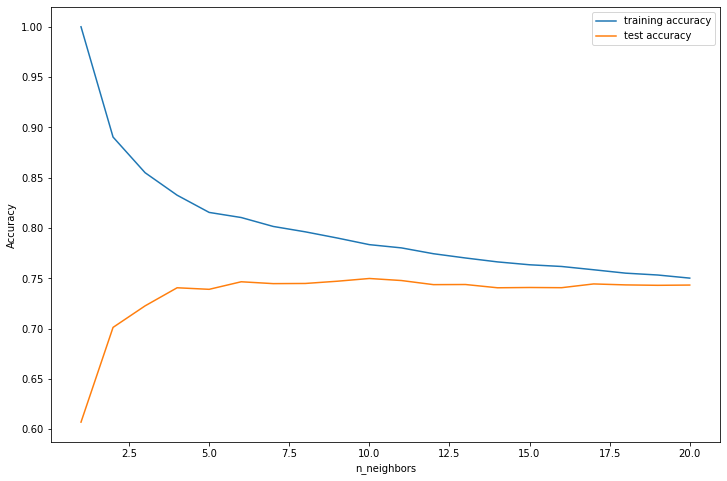

The optimal number of neighbors is 10


In [58]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [59]:

knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors =10)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(2))
print('KNN Testing Score :', knn_stand.score(X_test_STAND, y_test_STAND).round(2))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(2)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(2)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(2))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(2)

KNN Training Score: 0.78
KNN Testing Score : 0.75
KNN Train-Test Gap: 0.03


In [60]:
# creating a dictionary for model results
#selecting the best model

KNN_size=len(KNN_data.columns)+1

model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD','KNN'],
           
    'Training' : [lr_train_score.round(2), lasso_train_score2.round(2),
                                   ard_train_score2.round(2), knn_stand_score_train.round(2)],
           
    'Testing'  : [lr_test_score.round(2), lasso_test_score2.round(2),
                                   ard_test_score2.round(2),knn_stand_score_test.round(2)],
                    
    'Train-Test Gap' : [lr_test_gap.round(2), lasso_test_gap2.round(2),
                                        ard_test_gap2.round(2),knn_stand_test_gap.round(2)],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst2),
                                    len(ard_model_lst2), 'NA',],
                    
   'Model Coeficients' : [lr_model_lst, lasso_model_lst2, ard_model_lst2,'NA']
}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

model_performance.head()


,Model Type,Training,Testing,Train-Test Gap,Model Size,Model Coeficients
0,OLS,0.72,0.72,0.00,17,"[(intercept, 1.488), (CROSS_SELL_SUCCESS, -0.0..."
1,Lasso,0.70,0.71,0.01,22,"[(intercept, 1053.2618), (CROSS_SELL_SUCCESS, ..."
2,ARD,0.72,0.72,0.00,13,"[(intercept, 1.9), (CROSS_SELL_SUCCESS, -0.013..."
3,KNN,0.78,0.75,0.03,NA,NA


#MODEL SELECTED :KNN
----------

